In [1]:
#just once to install opencv
!pip install opencv-python

In [2]:
#just once to install matplotlib
!pip install matplotlib

In [3]:
#just once to install numpy
!pip install numpy

In [4]:
#just once to install google.colab
!pip install google-colab

In [5]:
!pip install PyWavelets

In [6]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os 

#first put a shortcut in your drive to the image processing folder

DATA_DIR = os.path.join('/content',
                        'drive',
                        'MyDrive',
                        'Image Processing and Analysis 2022',
                        'projects',
                        'Calcification Detection',
                        'dataset')


print(os.listdir(DATA_DIR))

['normals.txt', 'images', 'groundtruths', 'masks']


In [8]:
os.listdir(DATA_DIR + "/groundtruths")

['20587372_e634830794f5c1bd_MG_L_ML_ANON.tif',
 '20587544_d571b5880ad2a016_MG_R_CC_ANON.tif',
 '20588680_036aff49b8ac84f0_MG_L_ML_ANON.tif',
 '22427705_d713ef5849f98b6c_MG_L_CC_ANON.tif',
 '22580576_2a5b932da4ce5ca1_MG_L_ML_ANON.tif',
 '22613624_dcafa6ba6374ec07_MG_R_CC_ANON.tif',
 '22613770_45c7f44839fd9e68_MG_R_CC_ANON.tif',
 '22614431_d065adcb9905b973_MG_L_ML_ANON.tif',
 '22670465_7e677f3d530e41ed_MG_L_CC_ANON.tif',
 '22678953_b9a4da5f2dae63a9_MG_R_CC_ANON.tif',
 '24055078_2f1104b3cda7f145_MG_R_CC_ANON.tif',
 '24055328_1e10aef17c9fe149_MG_R_ML_ANON.tif',
 '24055806_f0f1a133837b5137_MG_R_CC_ANON.tif',
 '24058712_9e8db9e34d5275ef_MG_R_ML_ANON.tif',
 '30011798_4f20c1285d8f0b1f_MG_R_CC_ANON.tif',
 '30318067_4f20c1285d8f0b1f_MG_L_ML_ANON.tif',
 '50994273_cc9e66c5b31baab8_MG_R_CC_ANON.tif',
 '50997277_9054942f7be52dd9_MG_L_CC_ANON.tif',
 '50998204_f34ee0ab6591b792_MG_R_ML_ANON.tif',
 '50998981_a78eba834ef6ee88_MG_R_ML_ANON.tif',
 '51048891_f3e93e889a7746f0_MG_L_ML_ANON.tif',
 '51049053_8c

In [9]:
# import opencv
import cv2
# import numpy
import numpy as np


In [27]:
# preprocessing
# here explain what you code
def preprocessing(matrix, mask):

  import pywt  

  # enhancement
  # Comparing the Performance of Image Enhancement Methods
  # to Detect Microcalcification Clusters in Digital Mammography, Moradmand, Hajar, 2012

  # Five-level   discrete   wavelet decomposition  was  employed  by  using  Asymmetric Daubechies  of  order  8; 

  # normal wavelet from stackoverflow
  # convert to grayscale
  grayscale = cv2.cvtColor(matrix, cv2.COLOR_BGR2GRAY)

  # convert to float
  arrayFloat = np.float32(grayscale)
  arrayFloat /= 255
  
  # compute coefficients
  coeffs = pywt.wavedec2(arrayFloat,'haar',level=10)

  #process coefficients
  coeffs_H = list(coeffs)
  coeffs_H[0] *= 0

  # reconstruction
  arrayFloat_H = pywt.waverec2(coeffs_H, 'haar')
  arrayFloat_H *= 255
  arrayFloat_H = np.uint8(arrayFloat_H)

  preprocessed = arrayFloat_H
  return preprocessed

In [11]:
# candidateExtraction
# here explain what you code
def candidateExtraction(matrix, mask):
  candidates = matrix
  return candidates

In [12]:
# featuresExtraction
# here explain what you code
def featuresExtraction(matrix, mask):
  features = matrix
  return features

In [24]:
#import show special for google colab
from google.colab.patches import cv2_imshow
#import plt for display
import matplotlib.pyplot as plt

#go into de directory of the images

# this have 3 outputs root directory, the folders in the path and the files in the path.
# we ignore _ the two first because we are not interested in those
_, _, images = next(os.walk(os.path.join(DATA_DIR,'images')))
_, _, breastMasks = next(os.walk(os.path.join(DATA_DIR,'masks')))
_, _, groundTruths = next(os.walk(os.path.join(DATA_DIR, 'groundtruths')))

images.sort()
breastMasks.sort()
groundTruths.sort()

# read numbers of normal images
normals = []
with open(os.path.join(DATA_DIR,'normals.txt')) as f:
    for line in f:
        normals.append(line[:-1])



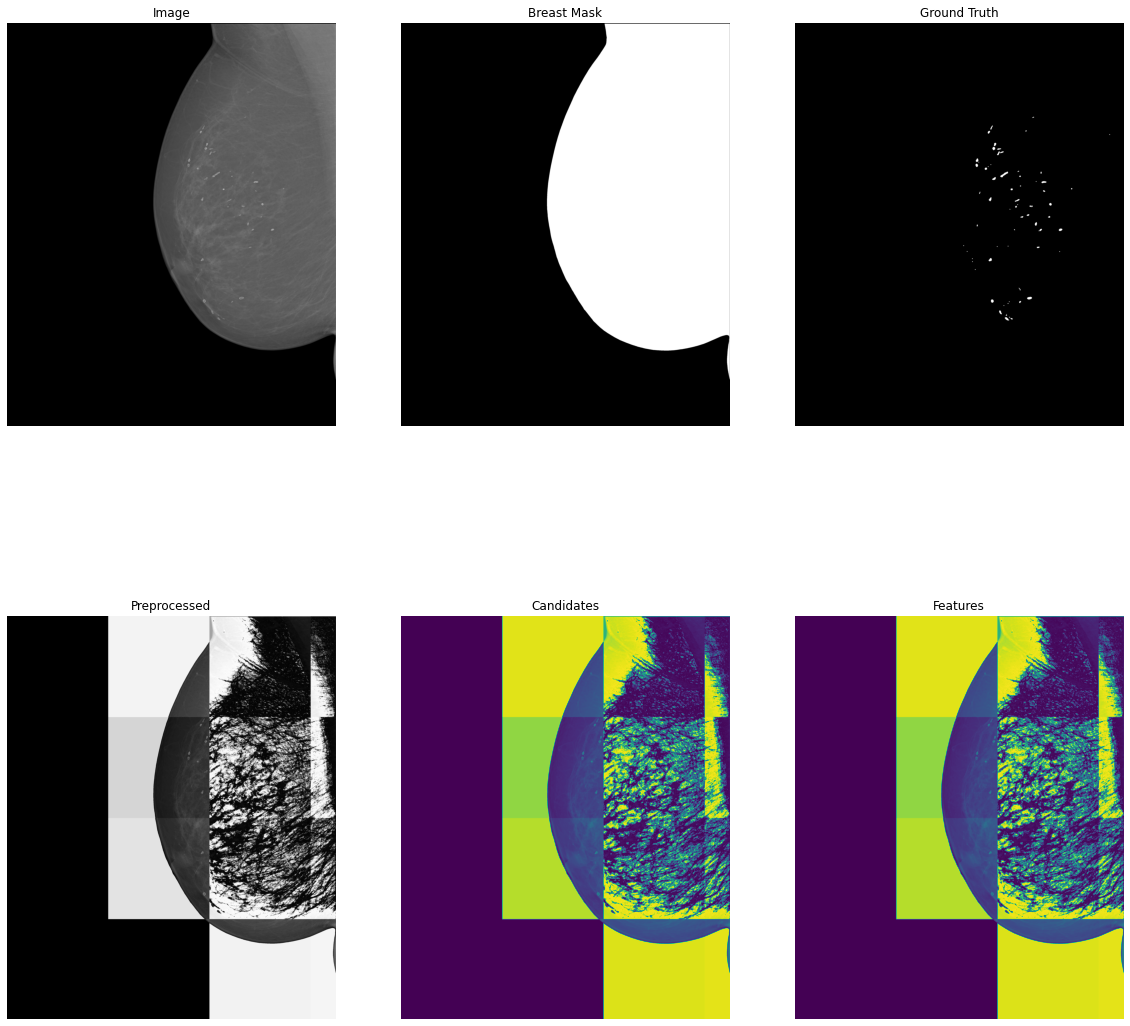

In [28]:

#go through the image files 
for image, breastMask, groundTruth in zip(images, breastMasks, groundTruths):
  # choose one
  # this are the last 4 of the number of the image name {numbers}_{}_{}_{}_{}_{}.tif
  # i suppose those are unique
  # if your code is working try other images!
  #print(breastMask)
  
  # 20588020, 7717, 5328, 3787, 5725, 3859, 6934, 50995872
  digits = '5328'

  if ((digits in image) and (digits in breastMask) and ('mask' in breastMask)):
    #upload
    img = cv2.imread(os.path.join(DATA_DIR,'images',image))
    imgMask = cv2.imread(os.path.join(DATA_DIR, 'masks', breastMask))
    imgGroundTruth = cv2.imread(os.path.join(DATA_DIR, 'groundtruths', image))

    # here you can prove things in the image

    # preprocessing
    preprocessed = preprocessing(img, imgMask)

    # candidate extraction
    candidates = candidateExtraction(preprocessed, imgMask)

    # feature extraction
    features = featuresExtraction(candidates, imgMask)

    # display related

    # matrix of plots and size of the figure
    figure, axis = plt.subplots(2, 3, figsize=(20,20))

    # draw in the axis the img
    axis[0][0].imshow(img)
    # switch off the axis of the plot
    axis[0][0].axis('off')
    # set a title for the plot
    axis[0][0].set_title('Image')

    axis[0][1].imshow(imgMask)
    axis[0][1].axis('off')
    axis[0][1].set_title('Breast Mask')

    axis[0][2].imshow(imgGroundTruth)
    axis[0][2].axis('off')
    axis[0][2].set_title('Ground Truth')

    axis[1][0].imshow(preprocessed, cmap='gray')
    axis[1][0].axis('off')
    axis[1][0].set_title('Preprocessed')

    axis[1][1].imshow(candidates)
    axis[1][1].axis('off')
    axis[1][1].set_title('Candidates')

    axis[1][2].imshow(features)
    axis[1][2].axis('off')
    axis[1][2].set_title('Features')

    # display figure with image
    plt.show()

    # display image with other function
    #cv2_imshow(features)
    


In [ ]:
# save images

cv2.imwrite(os.path.join('/content',
                        'drive',
                        'MyDrive',
                        'Results',
                         "image1.png"),
            features)